# 欠拟合和过拟合

你有没有类似这样的体验？考试前突击背了模拟题的答案，模拟题随意秒杀。但考试时出的题即便和模拟题相关，只要不是原题依然容易考挂。换种情况来说，如果考试前通过自己的学习能力从模拟题的答案里总结出一个比较通用的解题套路，考试时碰到这些模拟题的变种更容易答对。

有人曾依据这种现象对学生群体简单粗暴地做了如下划分：

![](../img/student_categories.png)

这里简要总结上图中学生的特点：

* 学渣：能力不行，也不认真做作业，容易考挂
* 学痞：能力不错，但喜欢裸奔，但还是可能考得比学渣好
* 学痴：能力不行，但贵在认真，考不赢学霸但秒掉学渣毫无压力
* 学霸：有能力，而且卖力，考完后喜大普奔

（现在问题来了，学酥应该在上图的哪里？）

学生的考试成绩和看起来与自身的训练量以及自身的学习能力有关。但即使是在科技进步的今天，我们依然没有完全知悉人类大脑学习的所有奥秘。的确，依赖数据训练的机器学习和人脑学习不一定完全相同。但有趣的是，机器学习模型也可能由于自身不同的训练量和不同的学习能力而产生不同的测试效果。为了科学地阐明这个现象，我们需要从若干机器学习的重要概念开始讲解。

## 训练误差（模考成绩）和泛化误差（考试成绩）

在实践中，机器学习模型通常在训练数据集上训练并不断调整模型里的参数。之后，我们通常把训练得到的模型在一个区别于训练数据集的测试数据集上测试，并根据测试结果评价模型的好坏。机器学习模型在训练数据集上表现出的误差叫做**训练误差**，在任意一个测试数据样本上表现出的误差的期望值叫做**泛化误差**。

训练误差和泛化误差的计算可以利用我们之前提到的损失函数，例如[线性回归](linear-regression-scratch.md)里用到的平方误差和[多类逻辑回归](softmax-regression-scratch.md)里用到的交叉熵损失函数。

之所以要了解训练误差和泛化误差，是因为统计学习理论基于这两个概念可以科学解释本节教程一开始提到的模型不同的测试效果。我们知道，理论的研究往往需要基于一些假设。而统计学习理论的一个假设是：

> 训练数据集和测试数据集里的每一个数据样本都是从同一个概率分布中相互独立地生成出的（独立同分布假设）。

基于以上独立同分布假设，给定任意一个机器学习模型及其参数，它的训练误差的期望值和泛化误差都是一样的。然而从之前的章节中我们了解到，在机器学习的过程中，模型的参数并不是事先给定的，而是通过训练数据学习得出的：模型的参数在训练中使训练误差不断降低。所以，如果模型参数是通过训练数据学习得出的，那么训练误差的期望值无法高于泛化误差。换句话说，通常情况下，由训练数据学到的模型参数会使模型在训练数据上的表现不差于在测试数据上的表现。

因此，一个重要结论是：

> 训练误差的降低不一定意味着泛化误差的降低。机器学习既需要降低训练误差，又需要降低泛化误差。

## 欠拟合和过拟合

实践中，如果测试数据集是给定的，我们通常用机器学习模型在该测试数据集的误差来反映泛化误差。基于上述重要结论，以下两种拟合问题值得注意：

* **欠拟合**：机器学习模型无法得到较低训练误差。
* **过拟合**：机器学习模型的训练误差远小于其在测试数据集上的误差。

我们要尽可能同时避免欠拟合和过拟合的出现。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论两个因素：模型的选择和训练数据集的大小。

### 模型的选择

在本节的开头，我们提到一个学生可以有特定的学习能力。类似地，一个机器学习模型也有特定的拟合能力。拿多项式函数举例，一般来说，高阶多项式函数（拟合能力较强）比低阶多项式函数（拟合能力较弱）更容易在相同的训练数据集上得到较低的训练误差。需要指出的是，给定数据集，过低拟合能力的模型更容易欠拟合，而过高拟合能力的模型更容易过拟合。模型拟合能力和误差之间的关系如下图。

![](../img/error_model_complexity.png)


### 训练数据集的大小

在本节的开头，我们同样提到一个学生可以有特定的训练量。类似地，一个机器学习模型的训练数据集的样本数也可大可小。一般来说，如果训练数据集过小，特别是比模型参数数量更小时，过拟合更容易发生。除此之外，泛化误差不会随训练数据集里样本数量增加而增大。

![](../img/model_vs_data.png)

为了理解这两个因素对拟合和过拟合的影响，下面让我们来动手学习。

## 多项式拟合

我们以多项式拟合为例。给定一个**标量**数据点集合`x`和对应的标量目标值`y`，多项式拟合的目标是找一个K阶多项式，其由向量`w`和位移`b`组成，来最好地近似每个样本`x`和`y`。用数学符号来表示就是我们将学`w`和`b`来预测

$$\hat{y} = b + \sum_{k=1}^K x^k w_k$$

并以平方误差为损失函数。特别地，一阶多项式拟合又叫线性拟合。

### 创建数据集

这里我们使用一个人工数据集来把事情弄简单些，因为这样我们将知道真实的模型是什么样的。具体来说我们使用如下的二阶多项式来生成每一个数据样本

$$y = 1.2x - 3.4x^2 + 5.6x^3 + 5.0 + \text{noise}$$

这里噪音服从均值0和标准差为0.1的正态分布。

需要注意的是，我们用以上相同的数据生成函数来生成训练数据集和测试数据集。两个数据集的样本数都是100。

In [1]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_train = 100
num_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5.0

下面生成数据集。

In [2]:
x = nd.random.normal(shape=(num_train + num_test, 1))
X = nd.concat(x, nd.power(x, 2), nd.power(x, 3))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_w[2] * X[:, 2] + true_b
y += .1 * nd.random.normal(shape=y.shape)

('x:', x[:5], 'X:', X[:5], 'y:', y[:5])

('x:', 
 [[ 2.21220636]
  [ 0.7740038 ]
  [ 1.04344046]
  [ 1.18392551]
  [ 1.89171135]]
 <NDArray 5x1 @cpu(0)>, 'X:', 
 [[  2.21220636   4.893857    10.82622147]
  [  0.7740038    0.59908187   0.46369165]
  [  1.04344046   1.08876801   1.13606453]
  [  1.18392551   1.40167964   1.65948427]
  [  1.89171135   3.5785718    6.76962519]]
 <NDArray 5x3 @cpu(0)>, 'y:', 
 [ 51.6748848    6.3585763    8.94907284  11.09345436  33.03696442]
 <NDArray 5 @cpu(0)>)

### 定义训练和测试步骤

我们定义一个训练和测试的函数，这样在跑不同的实验时不需要重复实现相同的步骤。

以下的训练步骤在[使用Gluon的线性回归](linear-regression-gluon.md)有过详细描述。这里不再赘述。

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(X_train, X_test, y_train, y_test):
    # 线性回归模型
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    # 设一些默认参数
    learning_rate = 0.01
    epochs = 100
    batch_size = min(10, y_train.shape[0])
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(
        dataset_train, batch_size, shuffle=True)
    # 默认SGD和均方误差
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate})
    square_loss = gluon.loss.L2Loss()
    # 保存训练和测试损失
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(square_loss(
            net(X_train), y_train).mean().asscalar())
        test_loss.append(square_loss(
            net(X_test), y_test).mean().asscalar())
    # 打印结果    
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()
    return ('learned weight', net[0].weight.data(), 
            'learned bias', net[0].bias.data())

### 三阶多项式拟合（正常）

我们先使用与数据生成函数同阶的三阶多项式拟合。实验表明这个模型的训练误差和在测试数据集的误差都较低。训练出的模型参数也接近真实值。

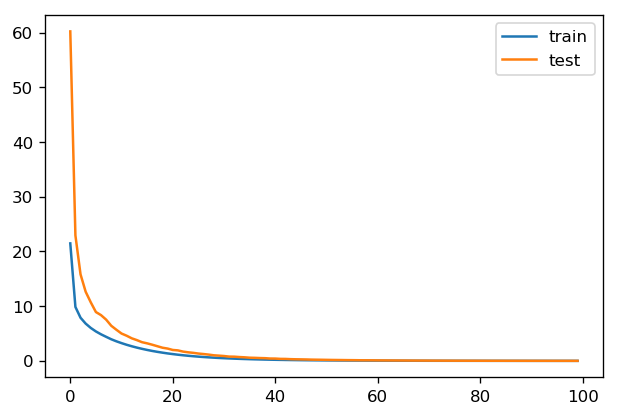

('learned weight', 
 [[ 1.32437599 -3.36299348  5.56226397]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 4.95107794]
 <NDArray 1 @cpu(0)>)

In [4]:
train(X[:num_train, :], X[num_train:, :], y[:num_train], y[num_train:])

### 线性拟合（欠拟合）

我们再试试线性拟合。很明显，该模型的训练误差很高。线性模型在非线性模型（例如三阶多项式）生成的数据集上容易欠拟合。

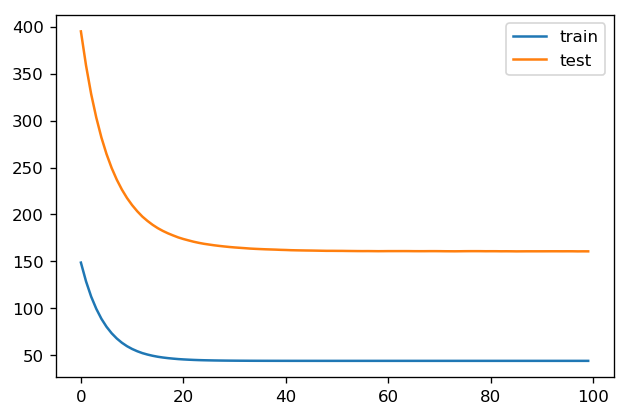

('learned weight', 
 [[ 15.57153225]]
 <NDArray 1x1 @cpu(0)>, 'learned bias', 
 [ 2.28035641]
 <NDArray 1 @cpu(0)>)

In [5]:
train(x[:num_train, :], x[num_train:, :], y[:num_train], y[num_train:])

### 训练量不足（过拟合）

事实上，即便是使用与数据生成模型同阶的三阶多项式模型，如果训练量不足，该模型依然容易过拟合。让我们仅仅使用两个训练样本来训练。很显然，训练样本过少了，甚至少于模型参数的数量。这使模型显得过于复杂，以至于容易被训练数据集中的噪音影响。在机器学习过程中，即便训练误差很低，但是测试数据集上的误差很高。这是典型的过拟合现象。

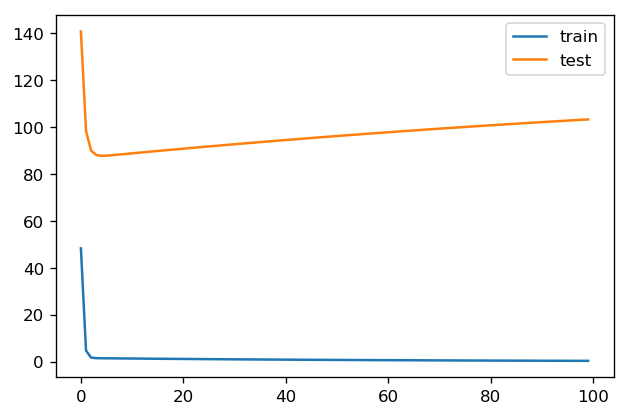

('learned weight', 
 [[ 1.38723636  1.93765891  3.50859237]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 1.23128557]
 <NDArray 1 @cpu(0)>)

In [6]:
train(X[0:2, :], X[num_train:, :], y[0:2], y[num_train:])

我们还将在后面的章节继续讨论过拟合问题以及应对过拟合的方法，例如正则化。

## 结论

* 训练误差的降低并不一定意味着泛化误差的降低。
* 欠拟合和过拟合都是需要尽量避免的。我们要注意模型的选择和训练量的大小。


## 练习

1. 学渣、学痞、学痴和学霸对应的模型复杂度、训练量、训练误差和泛化误差分别是怎样的？
1. 如果用一个三阶多项式模型来拟合一个线性模型生成的数据，可能会有什么问题？为什么？
1. 在我们本节提到的三阶多项式拟合问题里，有没有可能把1000个样本的训练误差的期望降到0，为什么？

**吐槽和讨论欢迎点**[这里](https://discuss.gluon.ai/t/topic/983)